In [3]:
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt

In [310]:
class K_Mean():
    def __init__(self, K, points, centroids):
        self.K = K
        self.N = len(points)
        self.points = np.zeros((self.N,2))
        self.centroids = np.zeros((self.K,2))
        
        for i in range(self.N):
            self.points[i, :] = points[i]
        for i in range(self.K):
            self.centroids[i, :] = centroids[i]
            
        self.centroid_for_all = np.mean(self.points, axis = 0)
        
        self.clusters = [[] for _ in range(self.K)] 
        self.count = 0
        
    def cal_distance(self, point1, point2):
        return math.sqrt((point1[0]-point2[0])**2+(point1[1]-point2[1])**2)
          
    def assign(self) :
        self.clusters = [[] for _ in range(self.K)] 
        for point in self.points:
            distance = np.zeros(self.K)
            for i in range(self.K):
                distance[i] = self.cal_distance(self.centroids[i], point)
            self.clusters[np.argmin(distance)].append(point)
        for i in range(self.K) :
            self.clusters[i] = np.array(self.clusters[i])
            
    def update(self) : 
        for i in range(self.K) : 
            x, y  = np.mean(self.clusters[i], axis = 0)
            self.centroids[i] = (x, y)
            
    def show(self) : 
        for i in range(self.K) : 
            plt.scatter(self.clusters[i][:, 0], self.clusters[i][:,1], )
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], marker = "*", s = 200, alpha = 0.3)
        plt.scatter(self.centroid_for_all[0], self.centroid_for_all[1], s = 200, alpha = 0.3)
        
    def fraction_var(self):
        all_data_variance =  np.sum(np.square(np.linalg.norm(self.points-self.centroid_for_all, ord=2, axis = 1)))/(self.N-1)
        between_cluster_variance = np.square(np.linalg.norm(self.centroids-self.centroid_for_all, ord = 2, axis = 1))
        for i in range(self.K):
            between_cluster_variance[i] *= len(self.clusters[i])
        between_cluster_variance =  np.sum(between_cluster_variance)/(self.N-1)
        return between_cluster_variance/all_data_variance
        
    def learn(self, iterative) :
        for _ in range(iterative):
            self.assign()
            self.update()
            
        
        

T1

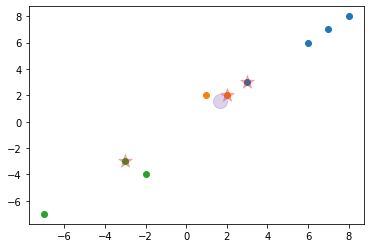

In [311]:
points = [(1, 2), (3, 3), (2, 2), (8, 8), (6, 6), (7, 7), (-3, -3), (-2, -4), (-7,-7)]
centoids = [(3, 3), (2, 2), (-3, -3)]
k_mean = K_Mean(3, points, centoids)

k_mean.assign() 
k_mean.show()
plt.show()

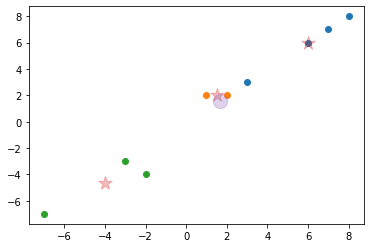

In [312]:
k_mean.update()
k_mean.show()
plt.show()

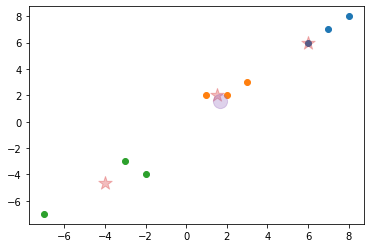

In [313]:
k_mean.assign() 
k_mean.show()
plt.show()

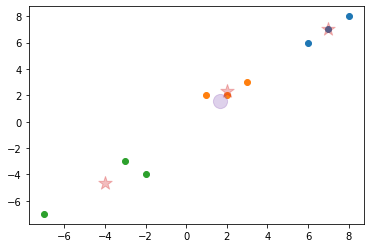

In [314]:
k_mean.update()
k_mean.show()
plt.show()

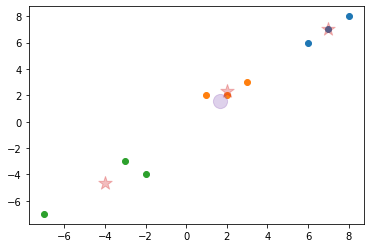

In [315]:
k_mean.assign() 
k_mean.show()
plt.show()

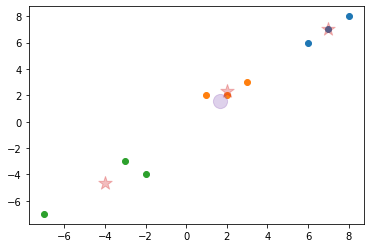

In [316]:
k_mean.update()
k_mean.show()
plt.show()

In [317]:
fraction_var1 = k_mean.fraction_var()
fraction_var1

0.9298618490967056

T2

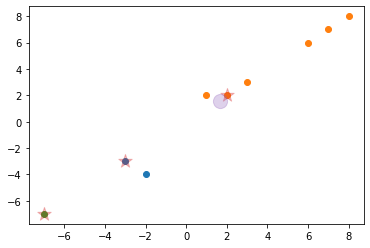

In [318]:
points = [(1, 2), (3, 3), (2, 2), (8, 8), (6, 6), (7, 7), (-3, -3), (-2, -4), (-7,-7)]
centoids = [(-3, -3), (2, 2), (-7, -7)]
k_mean = K_Mean(3, points, centoids)

k_mean.assign() 
k_mean.show()
plt.show()

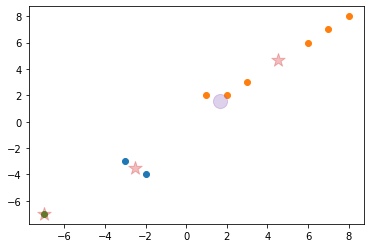

In [319]:
k_mean.update()
k_mean.show()
plt.show()

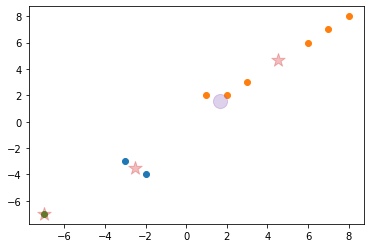

In [320]:
k_mean.assign() 
k_mean.show()
plt.show()

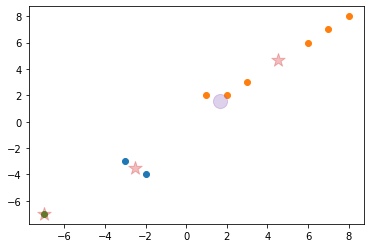

In [321]:
k_mean.update()
k_mean.show()
plt.show()

In [322]:
fraction_var2 = k_mean.fraction_var()
fraction_var2

0.813894792773645

T3

In [323]:
fraction_var1, fraction_var2

(0.9298618490967056, 0.813894792773645)

T4

In [5]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url) #training set
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url) #test set
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
train.describe()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [16]:
!pip3 install pandas --upgrade

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
